In [3]:
import japanize_matplotlib
def extract_num(data):
    ans = 0
    is_decimal = False
    divide = 0.1
    for d in data:
        if is_decimal:
            divide *= 10
        if '0'<=d and d<='9':
            ans = ans*10+int(d)
        elif d=='.':
            is_decimal=True
        else:
            return ans/divide

In [33]:
def calc_think_time_mean(time_ar):
    think_time = 0
    epoch = 0
    for i in range(len(time_ar)):
        if i%2==1:
            epoch+=1
            think_time += time_ar[i+1]-time_ar[i]
    return think_time/epoch
def calc_ttl_time(time_ar):
    return time_ar[len(time_ar)-1]-time_ar[0]

In [5]:
def read_file_and_return_mean_time(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    for data in datalist:
        iec_time.append(extract_num(data))
    f.close()
    return calc_think_time_mean(iec_time)

In [35]:
def read_file_and_return_ttl_time(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    for data in datalist:
        iec_time.append(extract_num(data))
    f.close()
    return calc_ttl_time(iec_time)
def read_file_and_return_epoch(file_name):
    f = open(file_name, 'r')
    iec_time = []
    datalist = f.readlines()
    return int(len(datalist)/2)

In [392]:
print(read_file_and_return_ttl_time('iec/24.txt'))
print(read_file_and_return_ttl_time('conv/24.txt'))

403.54878664016724
452.50456500053406


帰無仮説 0.002890926460730854


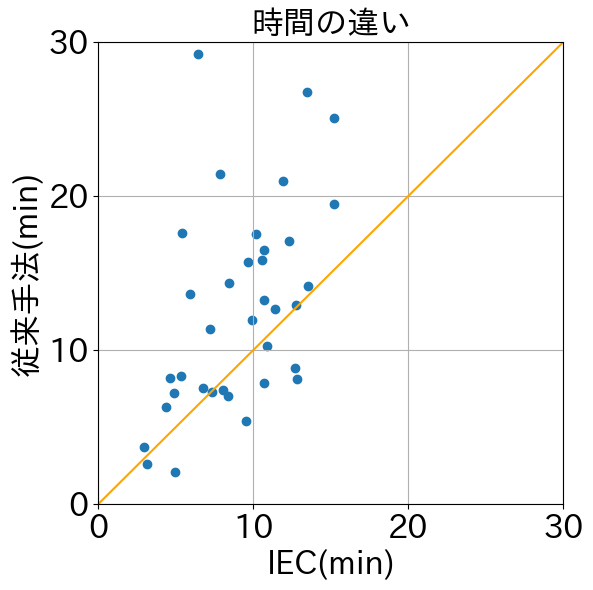

9.046427177389461 12.644588899502047


In [379]:

#かかった時間のプロット
import numpy as np
import matplotlib.pyplot as plt
import glob
font_size=23
iec_files = glob.glob("./iec/*")
conv_files = glob.glob("./conv/*")
iec_x = []
conv_y = []
iec_av = 0
conv_av = 0
x = np.linspace(0, 1600)
y = x
for file in iec_files:
    score = read_file_and_return_ttl_time(file)/60
    iec_x.append(score)
    iec_av += score
for file in conv_files:
    score = read_file_and_return_ttl_time(file)/60
    conv_y.append(score)
    conv_av += score
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)

plt.figure(figsize=[6,6])
plt.plot(x,y, color="orange")
plt.scatter(iec_x, conv_y)
plt.xlim(0,30)
plt.xticks(np.arange(0, 31, step=10))
plt.ylim(0,30)
plt.yticks(np.arange(0, 31, step=10))
plt.xlabel("IEC(min)",fontsize=font_size)
plt.ylabel("従来手法(min)",fontsize=font_size)
plt.title("時間の違い",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.grid()
plt.savefig("time_dif.pdf", bbox_inches='tight')
plt.show()
print(iec_av/len(iec_files),conv_av/len(conv_files))

帰無仮説 0.4651933383474054


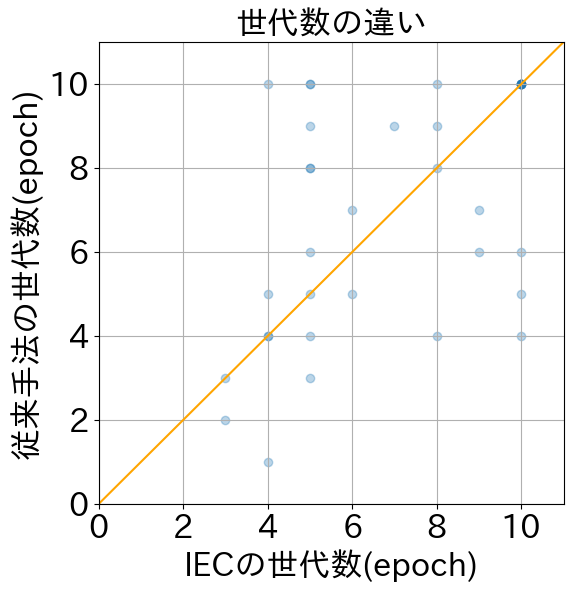

6.944444444444445 7.0


In [393]:
#世代数のプロット
iec_files = glob.glob("./iec/*")
conv_files = glob.glob("./conv/*")
iec_x = []
conv_y = []
iec_av = 0
conv_av = 0
for file in iec_files:
    score = read_file_and_return_epoch(file)
    iec_x.append(score)
    iec_av += score
for file in conv_files:
    score = read_file_and_return_epoch(file)
    conv_y.append(score)
    conv_av += score
x = np.linspace(0, 1600)
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)
plt.figure(figsize=[6,6])
plt.scatter(iec_x, conv_y, alpha=0.3)
plt.xlim(0,11)
plt.xticks(np.arange(0, 11, step=2))
plt.ylim(0,11)
plt.yticks(np.arange(0, 11, step=2))
plt.xlabel("IECの世代数(epoch)",fontsize=font_size)
plt.ylabel("従来手法の世代数(epoch)",fontsize=font_size)
plt.title("世代数の違い",fontsize=font_size)
plt.plot(x,x, color="orange")
plt.tick_params(labelsize=font_size)
plt.grid()
plt.savefig("epochdif.pdf", bbox_inches='tight')
plt.show()
print(iec_av/len(iec_files),conv_av/len(conv_files))

Text(0.5, 1.0, 'title')

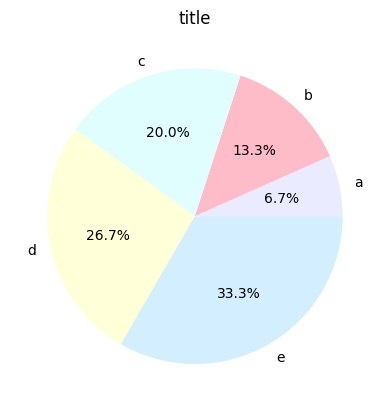

In [57]:
#円グラフ
colors = ["#EAEBFF", "#FEBCC8", "#E0FEFE", "#FFFFD8", "#D3EEFF"]
label = ["purple", "pink", "skyblue", "yellow", "blue"]
x = np.array([100, 200, 300, 400, 500])
plt.pie(x,labels=label,colors=colors,autopct="%1.1f%%")
plt.title("title")

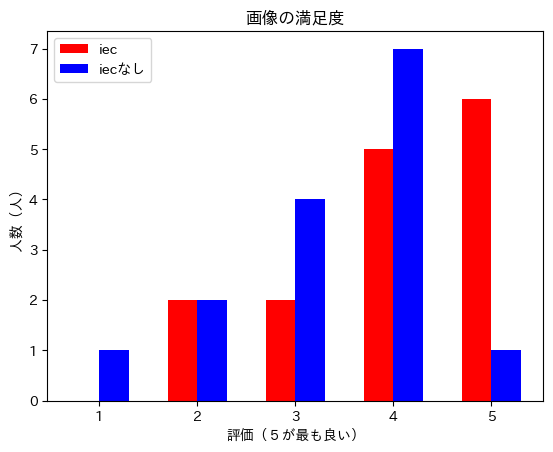

In [76]:
#
height1 = [0, 2, 2, 5, 6]  # 点数1
height2 = [1,2,4,7,1]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3
 
plt.bar(left, height1, color='r', width=width, align='center',label='iec')
plt.bar(left+width, height2, color='b', width=width, align='center',label='iecなし')
plt.xlabel("評価（５が最も良い）")
plt.ylabel("人数（人）")
plt.title("画像の満足度")
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left")
plt.savefig("sample.png")
plt.show()

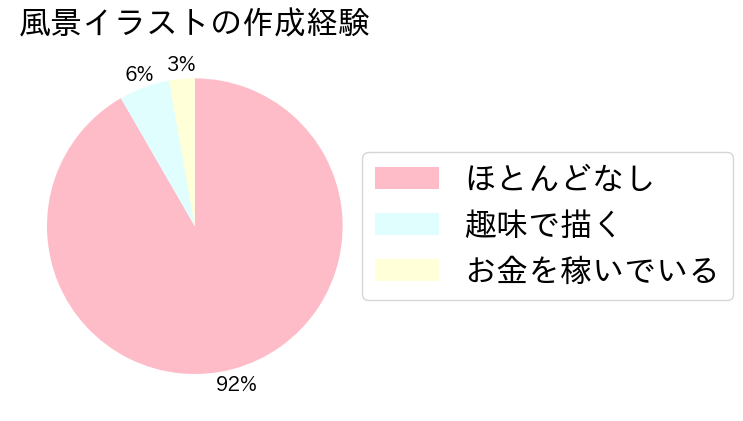

In [394]:
#イラスト作成経験
colors = ["#FEBCC8", "#E0FEFE", "#FFFFD8"]
label = ["ほとんどなし", "趣味で描く", "お金を稼いでいる"]
x = np.array([33,2,1])
patches, texts, autotexts = plt.pie(x,colors=colors,autopct="%1.0f%%",startangle=90,labeldistance=0.5,pctdistance=1.1,counterclock=False,textprops={'size': 'large'})
plt.legend(label, fontsize=font_size, loc="center right",bbox_to_anchor=(2, 0.5))
plt.title("風景イラストの作成経験",fontsize=font_size)
plt.setp(autotexts, size='x-large')
plt.savefig("illust_exp.pdf", bbox_inches='tight')

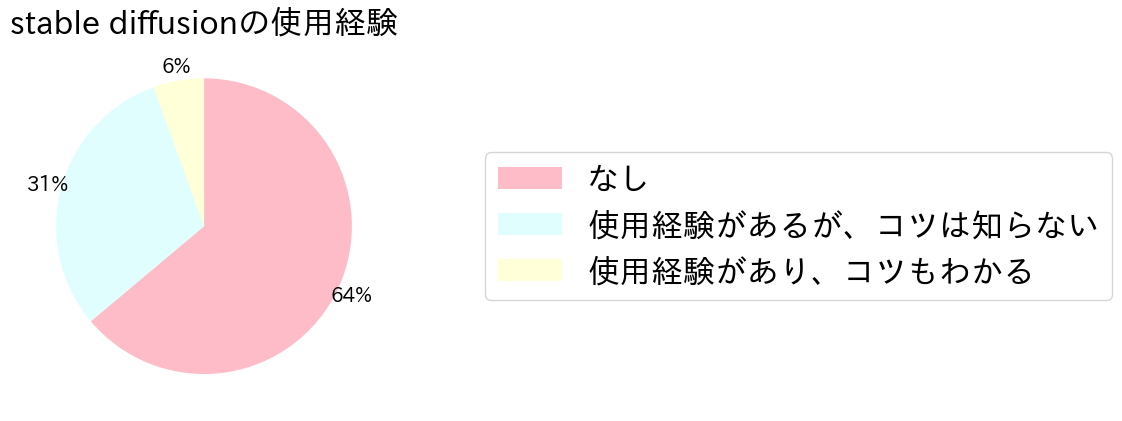

In [395]:
#stable diffusion prompt作成経験
colors = ["#FEBCC8", "#E0FEFE", "#FFFFD8"]
label = ["なし", "使用経験があるが、コツは知らない", "使用経験があり、コツもわかる"]
x = np.array([23,11,2])
patches, texts, autotexts = plt.pie(x,colors=colors,autopct="%1.0f%%",startangle=90,labeldistance=0.5,pctdistance=1.1,counterclock=False)
plt.legend(label, fontsize=font_size, loc="center right",bbox_to_anchor=(3, 0.5))
plt.title("stable diffusionの使用経験",fontsize=font_size)
plt.setp(autotexts, size='x-large')
plt.savefig("prompt_exp.pdf", bbox_inches='tight')

帰無仮説 0.09701002855249727


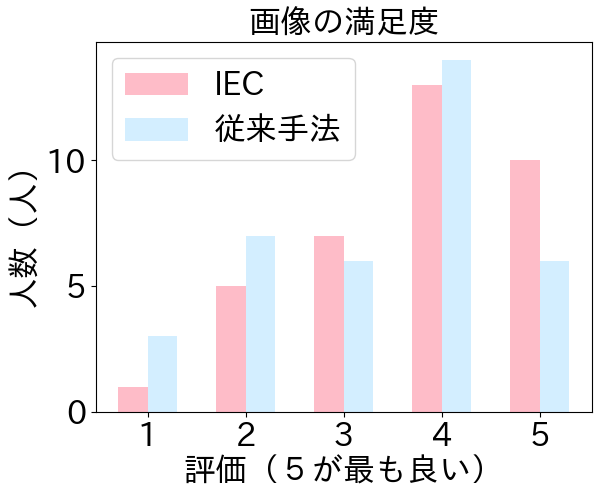

3.7222222222222223 3.361111111111111


In [396]:
#生成された画像の満足度
height1 = [1, 5, 7, 13, 10]  # 点数1
height2 = [3,7,6,14,6]  # 点数2
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3

iec_x = []
conv_y=[]
for i in range(5):
    for j in range(height1[i]):
        iec_x.append(i+1)
for i in range(5):
    for j in range(height2[i]):
        conv_y.append(i+1)
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)


plt.bar(left, height1, color='#FEBCC8', width=width, align='center',label='IEC')
plt.bar(left+width, height2, color='#D3EEFF', width=width, align='center',label='従来手法')
plt.xlabel("評価（５が最も良い）",fontsize=font_size)
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("画像の満足度",fontsize=font_size)
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.savefig("image_ev.pdf", bbox_inches='tight')
plt.show()
h1 = 0
h2 = 0
ttl = 0
for i in range(5):
    h1 += height1[i]*(i+1)
    h2 += height2[i]*(i+1)
    ttl += height1[i]
print(h1/ttl, h2/ttl)

帰無仮説 0.04305779384727768


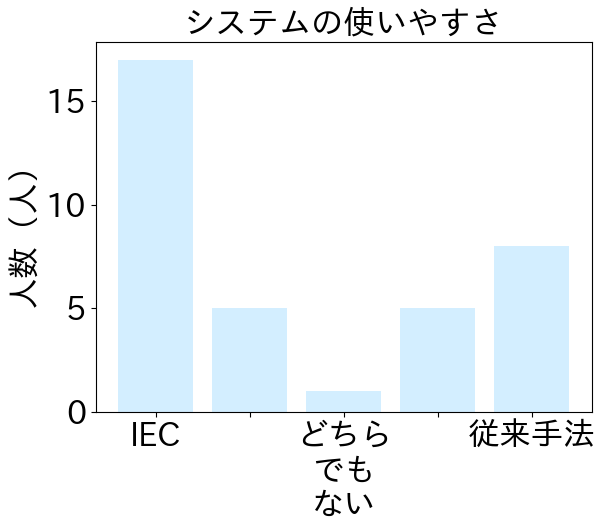

In [397]:
#使いやすさ

 
left = np.arange(len(height1))  # numpyで横軸を設定
 


plt.show()

left = np.array(['IEC', ' ', 'どちら\nでも\nない', '  ', '従来手法'])
height = np.array([17,5,1,5,8])
#検定
# np.mean(data) < ある値 and ttest_1samp(data, ある値).pvalue / 2 < 有意水準 のときに、帰無仮説を棄却します。
# https://docs.pyq.jp/python/pydata/scipy/ttest.html
arr = []
for i in range(len(height)):
    for j in range(height[i]):
        arr.append(i+1)
t,p = sp.stats.ttest_1samp(np.array(arr),popmean=3)
print("帰無仮説",p/2)

plt.bar(left, height, color='#D3EEFF')
# plt.xlabel("評価（５が最も良い）")
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("システムの使いやすさ",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.yticks(np.arange(0, 20, step=5))
plt.savefig("system_useful.pdf", bbox_inches='tight')
plt.show()

帰無仮説 0.10670926934527465


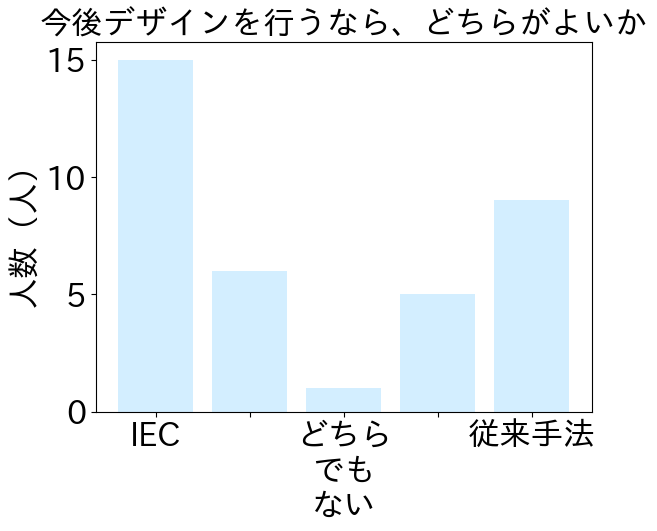

In [398]:
#今後デザインを行うなら、どちらがよいか
import scipy as sp
 
left = np.arange(len(height1))  # numpyで横軸を設定
 


plt.show()

left = np.array(['IEC', ' ', 'どちら\nでも\nない', '  ', '従来手法'])
height = np.array([15,6,1,5,9])
#検定
arr = []
for i in range(len(height)):
    for j in range(height[i]):
        arr.append(i+1)
t,p = sp.stats.ttest_1samp(np.array(arr),popmean=3)
print("帰無仮説",p/2)

plt.bar(left, height, color='#D3EEFF')
# plt.xlabel("評価（５が最も良い）")
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("今後デザインを行うなら、どちらがよいか",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.yticks(np.arange(0, 16, step=5))
plt.savefig("system_pref.pdf", bbox_inches='tight')
plt.show()

In [264]:
height1 = [0, 4, 4, 10, 7]  # 点数1
height2 = [2,3,5,12,3]  # 点数2
h1 = 0
h2 = 0
ttl = 0
for i in range(5):
    h1 += height1[i]*(i+1)
    h2 += height2[i]*(i+1)
    ttl += height1[i]
print(h1/ttl, h2/ttl)

3.8 3.44


[16, 17, 15, 35, 34, 26, 4, 6, 22, 5, 18, 14, 11, 38, 2, 19, 9, 27, 28, 21, 32, 25, 36, 1, 8, 39, 7, 31, 3]


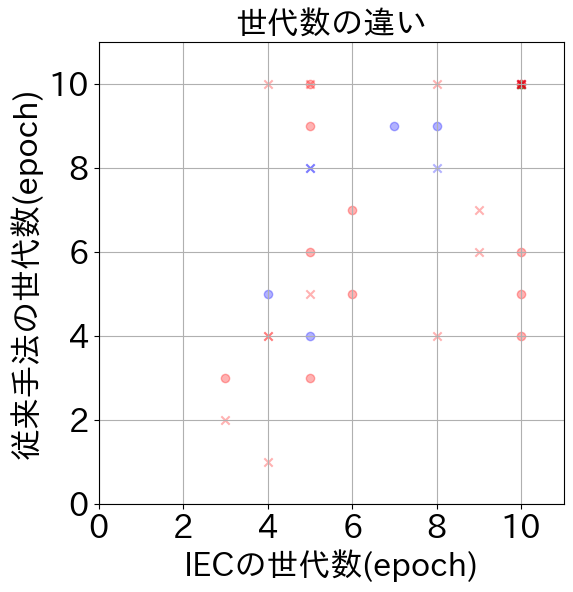

In [387]:
#世代数のプロット
iec_files = glob.glob("./iec/*")
conv_files = glob.glob("./conv/*")
preference=[1,2,1,1,5,4,1,1,2,1,3,5,1,1,5,1,2,1,5,4,4,1,5,2,1,5,5,4,1]
index=[16,17,15,35,34,26,4,6,22,5,18,14,11,38,2,19,9,27,28,21,32,25,36,1,8,39,7,31,3]
pref = [0 for i in range(40)]
print(index)
for i in range(len(index)):
    pref[index[i]]=preference[i]
iec_x = []
conv_y = []
for i in range(5):
    iec_x.append([])
    conv_y.append([])
iec_av = 0
conv_av = 0
for file in iec_files:
    score = read_file_and_return_epoch(file)
    here = int(file[6:len(file)-4])
    iec_x[pref[here]-1].append(score)
    iec_av += score
for file in conv_files:
    score = read_file_and_return_epoch(file)
    here = int(file[7:len(file)-4])
    conv_y[pref[here]-1].append(score)
    conv_av += score

plt.figure(figsize=[6,6])
plt.scatter(iec_x[0], conv_y[0], alpha=0.3,marker='o',color='red')
plt.scatter(iec_x[1], conv_y[1], alpha=0.3,marker='o',color='blue')
plt.scatter(iec_x[2], conv_y[2], alpha=0.3,marker='^',color='green')
plt.scatter(iec_x[3], conv_y[3], alpha=0.3,marker='x',color='blue')
plt.scatter(iec_x[4], conv_y[4], alpha=0.3,marker='x',color='red')
plt.xlim(0,11)
plt.xticks(np.arange(0, 11, step=2))
plt.ylim(0,11)
plt.yticks(np.arange(0, 11, step=2))
plt.xlabel("IECの世代数(epoch)",fontsize=font_size)
plt.ylabel("従来手法の世代数(epoch)",fontsize=font_size)
plt.title("世代数の違い",fontsize=font_size)
# plt.plot(x,y, color="orange")
plt.tick_params(labelsize=font_size)
plt.grid()
plt.savefig("epochdif.pdf", bbox_inches='tight')
plt.show()

帰無仮説 0.008587116144651451


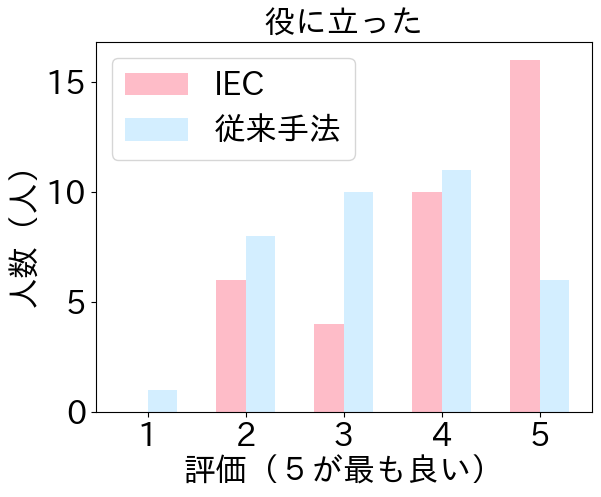

4.0 3.361111111111111


In [399]:
#どれくらい役に立ったか
height1 = [0, 6, 4, 10, 16]  # 点数1
height2 = [1,8,10,11,6]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3

iec_x = []
conv_y=[]
for i in range(5):
    for j in range(height1[i]):
        iec_x.append(i+1)
for i in range(5):
    for j in range(height2[i]):
        conv_y.append(i+1)
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)


plt.bar(left, height1, color='#FEBCC8', width=width, align='center',label='IEC')
plt.bar(left+width, height2, color='#D3EEFF', width=width, align='center',label='従来手法')
plt.xlabel("評価（５が最も良い）",fontsize=font_size)
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("役に立った",fontsize=font_size)
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.savefig("usefull.pdf", bbox_inches='tight')
plt.show()
h1 = 0
h2 = 0
ttl = 0
for i in range(5):
    h1 += height1[i]*(i+1)
    h2 += height2[i]*(i+1)
    ttl += height1[i]
print(h1/ttl, h2/ttl)

帰無仮説 0.4619834487389959


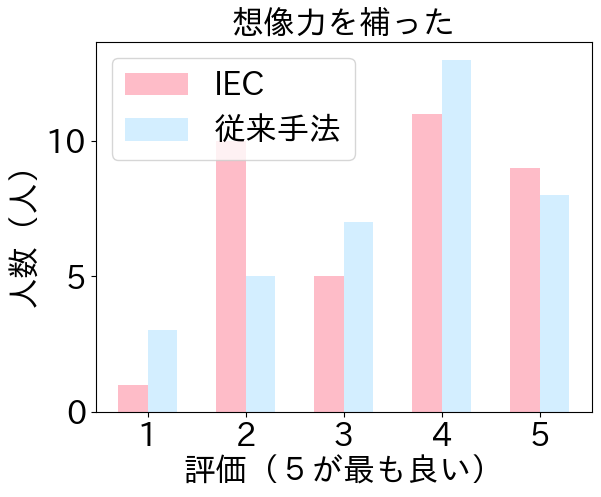

3.4722222222222223 3.5


In [400]:
#想像力を補ったか
height1 = [1, 10, 5, 11, 9]  # 点数1
height2 = [3,5,7,13,8]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3

iec_x = []
conv_y=[]
for i in range(5):
    for j in range(height1[i]):
        iec_x.append(i+1)
for i in range(5):
    for j in range(height2[i]):
        conv_y.append(i+1)
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)


plt.bar(left, height1, color='#FEBCC8', width=width, align='center',label='IEC')
plt.bar(left+width, height2, color='#D3EEFF', width=width, align='center',label='従来手法')
plt.xlabel("評価（５が最も良い）",fontsize=font_size)
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("想像力を補った",fontsize=font_size)
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.savefig("compensation.pdf", bbox_inches='tight')
plt.show()
h1 = 0
h2 = 0
ttl = 0
for i in range(5):
    h1 += height1[i]*(i+1)
    h2 += height2[i]*(i+1)
    ttl += height1[i]
print(h1/ttl, h2/ttl)

帰無仮説 0.3604440012925876


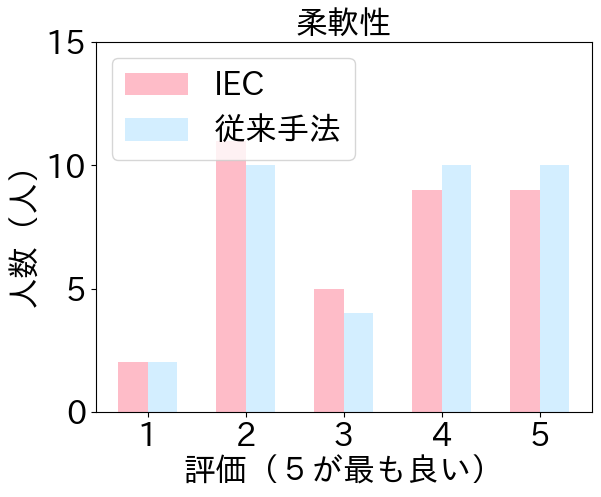

3.3333333333333335 3.4444444444444446


In [401]:
#柔軟性
height1 = [2, 11, 5, 9, 9]  # 点数1
height2 = [2,10,4,10,10]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['1', '2', '3', '4', '5']
 
width = 0.3

iec_x = []
conv_y=[]
for i in range(5):
    for j in range(height1[i]):
        iec_x.append(i+1)
for i in range(5):
    for j in range(height2[i]):
        conv_y.append(i+1)
#検定
t,p = sp.stats.ttest_ind(np.array(iec_x),np.array(conv_y),equal_var=False)
print("帰無仮説",p/2)


plt.bar(left, height1, color='#FEBCC8', width=width, align='center',label='IEC')
plt.bar(left+width, height2, color='#D3EEFF', width=width, align='center',label='従来手法')
plt.xlabel("評価（５が最も良い）",fontsize=font_size)
plt.ylabel("人数（人）",fontsize=font_size)
plt.title("柔軟性",fontsize=font_size)
plt.xticks(left + width/2, labels)
plt.legend(loc="upper left",fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.yticks(np.arange(0, 16, step=5))
plt.savefig("flexibility.pdf", bbox_inches='tight')
plt.show()
h1 = 0
h2 = 0
ttl = 0
for i in range(5):
    h1 += height1[i]*(i+1)
    h2 += height2[i]*(i+1)
    ttl += height1[i]
print(h1/ttl, h2/ttl)